16:02:45 - cmdstanpy - INFO - Chain [1] start processing
16:02:45 - cmdstanpy - INFO - Chain [1] done processing
d:\game\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


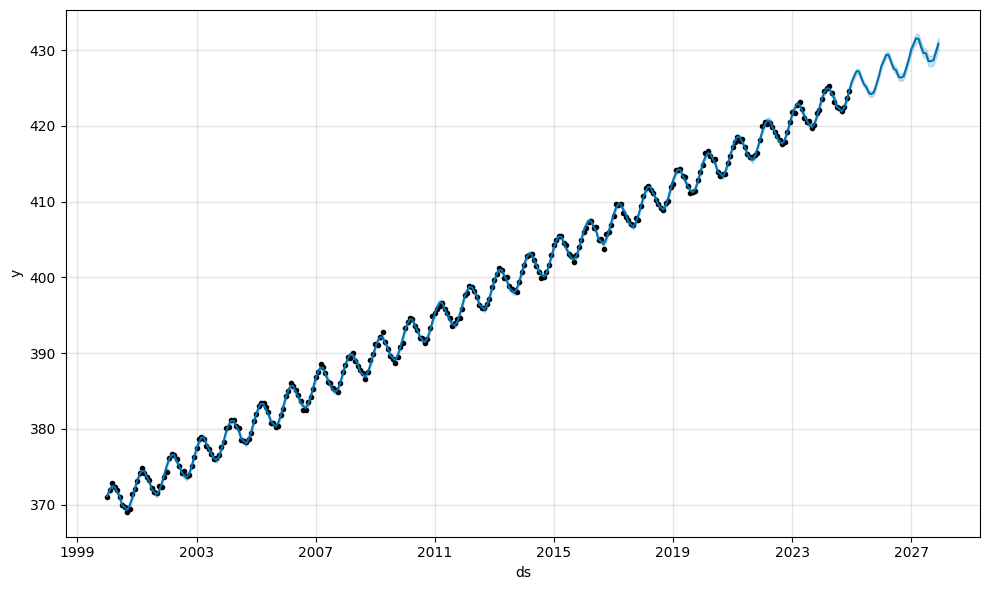

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import pickle


df = pd.read_csv("../data/co2_monthly.csv", parse_dates=["date"])
df = df.rename(columns={"date": "ds", "value": "y"})


m = Prophet(yearly_seasonality=True)
m.add_regressor("planting_rate")
m.add_regressor("cars_per_k")

# Train model
m.fit(df)


future = m.make_future_dataframe(periods=36, freq="M")
future["planting_rate"] = 300  
future["cars_per_k"] = 600

forecast = m.predict(future)

# Plot
fig = m.plot(forecast)
plt.show()


with open("../models/prophet_model.pkl", "wb") as f:
    pickle.dump(m, f)
